In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Linux Libertine O"
plt.rcParams["font.size"] = 30

In [ ]:
data = pd.read_csv("../data/experiments/moving.csv")

In [ ]:
car = data[data["id"].isin(["id1", "id2", "id3", "id4"])]
car = car[["id", "time"]]

# Sort the values of the index by the time column, but transform it to datetime previously
car["time"] = pd.to_datetime(car["time"])
car = car.sort_values("time")

# Group by minute and count the number of data points
car["minute"] = car["time"].dt.floor("min")
numids = car.groupby("minute").count().reset_index()["time"].to_numpy()

# Insert a 0 in element 3, because it is missing
numids = np.insert(numids, 3, 0)

In [ ]:
leftids = ["id1", "id2"]
rightids = ["id3", "id4"]

# Set if the message is from left or right tire with 'left' or 'right' in column 'side'
car["side"] = "left"
car.loc[car["id"].isin(rightids), "side"] = "right" 

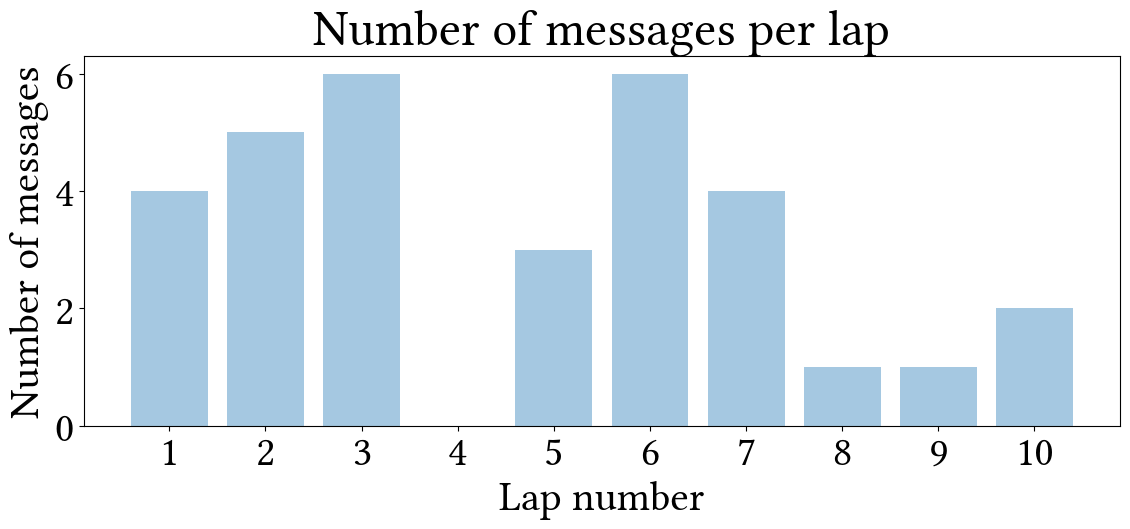

In [68]:
c = sns.color_palette()[0]

# Plot the number of data points per lap as a bar plot. Use seaborn to make it look better
plt.figure(figsize=(12, 6))
plt.bar(range(1, 11), numids, color=c, alpha=0.4)
plt.xlabel("Lap number")
plt.ylabel("Number of messages")
plt.title("Number of messages per lap")
plt.xticks(range(1, 11))
plt.tight_layout()

# Save as pdf
plt.savefig("../pics/num_messages_per_lap.pdf", bbox_inches="tight")

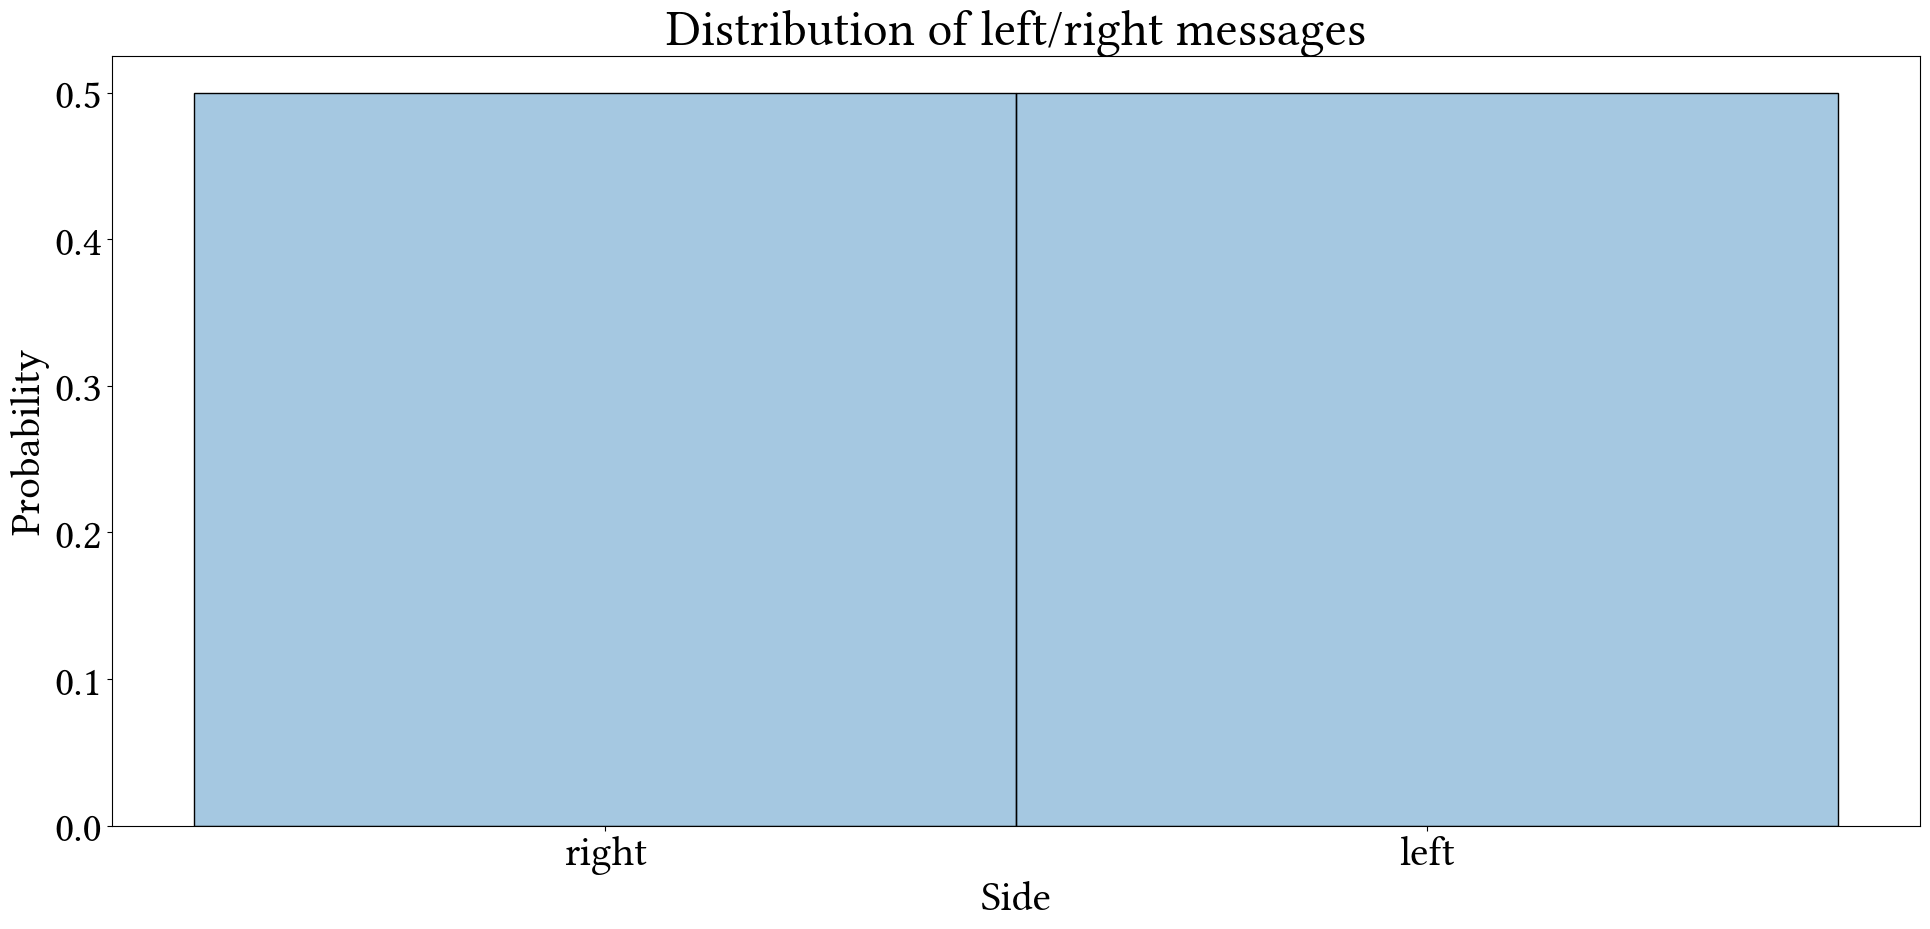

In [66]:
c = sns.color_palette()[0]

# Plot the distribution of left/right messages overall with seaborn
plt.figure(figsize=(20, 10))
sns.histplot(data=car, x="side", discrete=True, stat="probability", color=c, alpha=0.4)
plt.xlabel("Side")
plt.ylabel("Probability")
plt.title("Distribution of left/right messages")
plt.tight_layout()
